# Decision Tree Classification

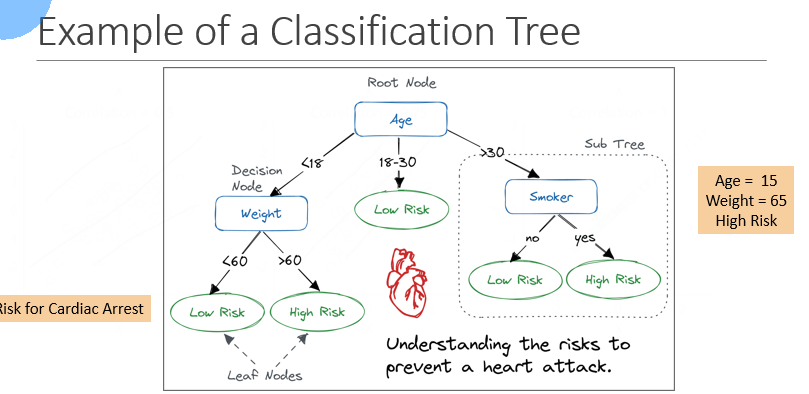

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Step 2 - Perform basic data quality checks

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates(keep = "first").reset_index(drop = True)
df.shape

(149, 5)

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Step 3 - Seperate X and Y(species)

In [9]:
X = df.drop(columns = ["species"])
Y = df["species"]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Train test split

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [17]:
ytrain.head()

22        setosa
15        setosa
65    versicolor
11        setosa
42        setosa
Name: species, dtype: object

In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
117,7.7,3.8,6.7,2.2
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [19]:
ytest.head()

73     versicolor
18         setosa
117     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

# Step 4 - Apply preprocesing on X

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform = "pandas")
num_pipe.fit(xtrain, ytrain)

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [22]:
xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
22,-1.472861,1.250779,-1.550157,-1.307278
15,-0.142305,3.060416,-1.265659,-1.039522
65,1.067290,0.119755,0.384431,0.299256
11,-1.230942,0.798369,-1.208759,-1.307278
42,-1.714780,0.345960,-1.379458,-1.307278


In [28]:
xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.341533,-0.558859,0.555130,0.031501
18,-0.142305,1.703188,-1.151860,-1.173400
117,2.276886,1.703188,1.693124,1.370279
78,0.220573,-0.332654,0.441331,0.433134
76,1.188250,-0.558859,0.612030,0.299256


# Build the model

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    max_depth = 1,
    min_samples_leaf = 5,
    min_samples_split = 5,
    criterion = "gini",
    random_state = 42
)
dtc.fit(xtrain_pre, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
dtc.score(xtrain_pre, ytrain)

0.680672268907563

In [29]:
dtc.score(xtest_pre, ytest)

0.6333333333333333

# RandomisedSearch to tune hyperparameters

In [30]:
params = {
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_split": [5, 6, 7, 8, 9],
    "min_samples_leaf": [5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

model = DecisionTreeClassifier(random_state=42)
rscv = RandomizedSearchCV(model, params, cv=5, scoring="f1_macro")
rscv.fit(xtrain_pre, ytrain)

,estimator,DecisionTreeC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rscv.best_score_

np.float64(0.9048879551820729)

In [33]:
rscv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': 2,
 'criterion': 'entropy'}

In [34]:
best_dtc = rscv.best_estimator_
best_dtc

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,8
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
best_dtc.score(xtrain_pre, ytrain)

0.9495798319327731

In [36]:
best_dtc.score(xtest_pre, ytest)

0.9666666666666667

# Model Evaluation

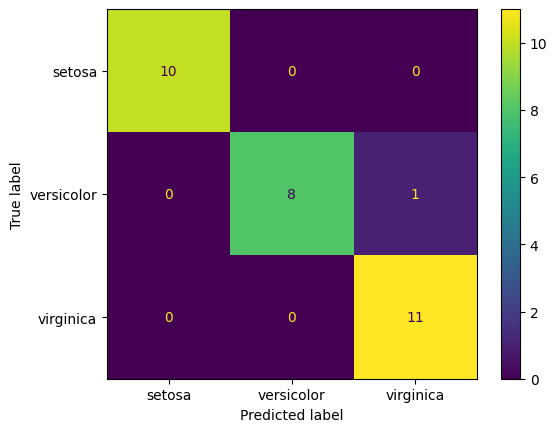

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, xtest_pre, ytest)

In [40]:
from sklearn.metrics import classification_report

ypred_test = best_dtc.predict(xtest_pre)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# Plot the decision tree

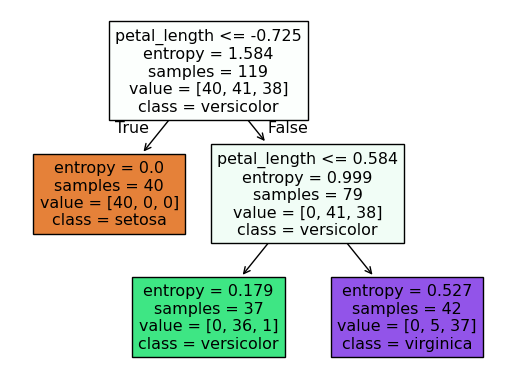

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(best_dtc, feature_names=xtrain_pre.columns, class_names=best_dtc.classes_, filled=True)
plt.show()

# Feature importances

In [43]:
best_dtc.feature_importances_

array([0., 0., 1., 0.])

In [44]:
xtrain_pre.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [45]:
imp = pd.Series(best_dtc.feature_importances_, index = xtrain_pre.columns)
imp

sepal_length    0.0
sepal_width     0.0
petal_length    1.0
petal_width     0.0
dtype: float64

<Axes: >

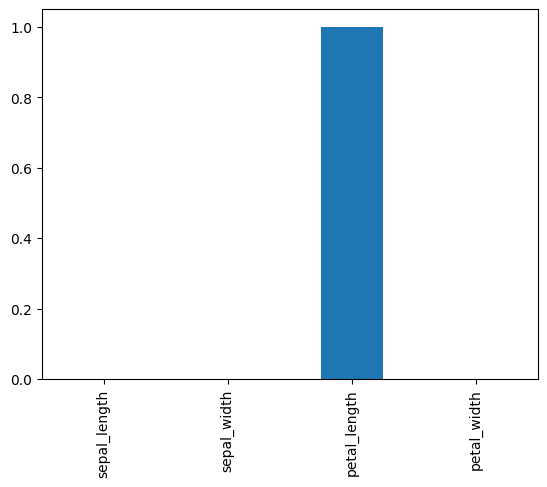

In [46]:
imp.plot(kind = "bar")

In [47]:
best_dtc

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,8
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Out of Sample Prediction

In [48]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [49]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [51]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.384225,-1.237473,0.156833,0.165379
1,1.309209,0.119755,0.782729,1.504157
2,-0.868063,-1.237473,-0.412164,-0.102377
3,-1.714780,-0.332654,0.270632,-1.307278
4,0.099614,-0.106449,0.782729,0.834768
5,-0.384225,1.024574,-1.379458,-1.307278
6,-0.263265,-0.106449,-0.070766,0.165379
7,0.825371,-0.106449,0.839629,1.102523
8,-0.626144,1.476983,-1.265659,-1.307278
9,-0.868063,0.798369,-1.265659,0.165379


In [53]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [54]:
probs = best_dtc.predict_proba(xnew_pre)
probs[0:5]

array([[0.        , 0.97297297, 0.02702703],
       [0.        , 0.11904762, 0.88095238],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.11904762, 0.88095238]])

In [57]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [58]:
xnew["species"] = preds
xnew[best_dtc.classes_] = probs

In [59]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,0.972973,0.027027
1,6.9,3.1,5.1,2.3,virginica,0.0,0.119048,0.880952
2,5.1,2.5,3.0,1.1,versicolor,0.0,0.972973,0.027027
3,4.4,2.9,NaN,0.2,versicolor,0.0,0.972973,0.027027
4,5.9,3.0,5.1,1.8,virginica,0.0,0.119048,0.880952
5,5.5,3.5,1.3,0.2,setosa,1.0,0.000000,0.000000
6,5.6,NaN,3.6,1.3,versicolor,0.0,0.972973,0.027027
7,6.5,3.0,5.2,2.0,virginica,0.0,0.119048,0.880952
8,5.3,3.7,1.5,0.2,setosa,1.0,0.000000,0.000000
9,5.1,3.4,1.5,NaN,setosa,1.0,0.000000,0.000000


In [60]:
xnew.to_csv("predictions.csv", index=False)

# Save the model object

In [61]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [62]:
best_dtc

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,8
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
import joblib

joblib.dump(num_pipe, "iris_pre.joblib")

['iris_pre.joblib']

In [64]:
joblib.dump(best_dtc, "iris_model.joblib")

['iris_model.joblib']

# Load the model

In [65]:
p = joblib.load("iris_pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [66]:
m = joblib.load("iris_model.joblib")
m

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,8
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None
